# Viterbi Alogrithm (VA)

- 1967'de Andrew J. Viterbi tarafından geliştirilmiş.
- İlk olarak gürültülü (noisy) iletişim kanalları üzerinden verilerdeki hataların kontrol edilmesi için evrişimsel kodların (convolutional codes) çözülmesine bir çözüm olarak önerildi.
- Dinamik bir Programlama Algorıtmasıdır.
- VA bir maksimum olabilirlik hata düzeltme kodu çözücü olarak görülebilir.
- Söylendiği gibi VA başlangıçta iletişim alanında uygulamak için önerildi, 
  ama iletişim dışında da başka alanlarda(**handwritten word recognition, speech recognition, speech synthesis, 
  diarization, keyword spotting, computational linguistics, and bioinformatics,etc.** ) uygulanmaktadır. 


Burada Viterbi Algorıtması örnek gerçekleştirim için iki farklı uygulama alanında kullanılmaktadır:
- İleştişim alanında, hata kontrol etmek ve düzeltmek için (Decoding Convolutional Codes with VA)
- ve Hidden Markov Model(HMM) gizli durumların en olası sırası veya yolunu bulmak için (Finding the most likely sequence of hidden states)

In [27]:
import numpy as np
from numpy  import log as ln
import random as rd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Viterbi Algorithm for Decoding Convolutional Codes 

### Gürültülü İletşim Kanali

Viterbi Algoritması, iletişim kanalları üzerinden verilerdeki hataların kontrol edilmesi veya düzeltilmesi için kullanılan hata düzeltme kodu olan evrişimsel kodların (convolutional codes) çözülmesine bir çözüm olarak önerildiği söylendi. Ama VA iletişim esnasında hangi adımda kullanılır? Aşagıdaki şekilde gösterilmektedir. 

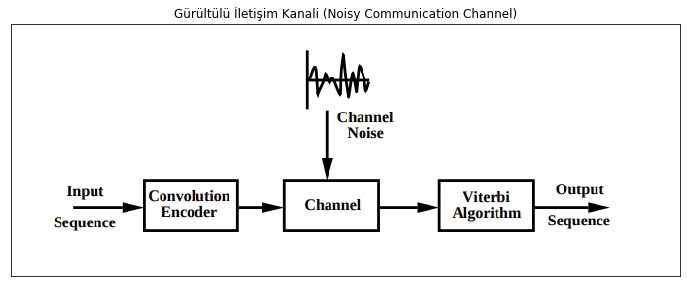

In [82]:
%matplotlib inline
plt.figure(figsize=(12,15))
plt.xticks([]),plt.yticks([])
plt.title("Gürültülü İletişim Kanali (Noisy Communication Channel)")
img = mpimg.imread('encoder.png')
plt.imshow(img)
plt.show()

 Mesaj ilk olarak kodlayıcı ile kodlanır ve  gürültülü olabilen  bir iletişim kanali üzerinden iletilir. Karşıda gelen mesaj hatalı olduğunu varsayılarak Viterbi kod çözücü ile çözülmektedir. Orijinal mesaj elde etmiş oluruz. 

In [2]:
def xor(b1,b2):
    if str(b1) == str(b2):
        return '0'
    else: return '1'

In [78]:
print("xor(0,0) = ",xor(0,0))
print("xor(0,1) = ",xor(0,1))
print("xor(1,0) = ",xor(1,0))
print("xor(1,0) = ",xor(1,1))

xor(0,0) =  0
xor(0,1) =  1
xor(1,0) =  1
xor(1,0) =  0


### Convolutional Encoder - Kodlayıcı Devresi

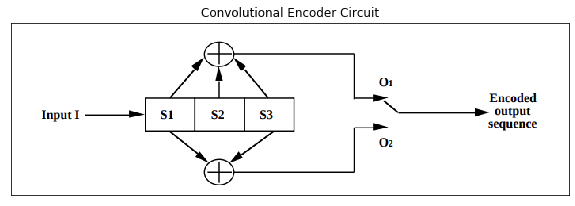

In [104]:
plt.figure(figsize=(10,10))
plt.xticks([]),plt.yticks([])
plt.title("Convolutional Encoder Circuit")
img = mpimg.imread('encoder-circuit.png')
plt.imshow(img)
plt.show()

Kodlayıcı üç yazmaçtan (S1, S2 ve S3) oluşmaktadır. Girdi olarak bir bit alır ve çıkışında iki bit (O1 ve O2) verilir.

Örneğin, yukarıda verilmiş gürültülü (noisy) iletişim kanalı üzerinden **I = 01100000** ikili mesajımızı yollamak istiyoruz. İletişim kanali güvensiz (gürültülü) olduğundan dolayı verilerdeki hataların düzeltilmesi için I mesajı iletmeden önce kodlamamız gerekir. I mesajını kodlamak için evrişimsel kodlayıcı (convolutional encoder) kallanılmaktadır.

Yukarıdaki kodlayıcı şu şekilde çalışmaktadır:

S1 = S2 = S3 = 0 varsayalım. İlk başta S2 yazmacı değeri S3 ye aktarılır, ardından S1 değeri S2'ye ve I mesajının ilk biti S1'ye aktarılır.
1. output1 = S1 xor S2 xor S3 
2. ve output2 = S1 xor S3 hesaplanır.

I mesajı ilk biti için çıkıs olarak output1 ve output2 elde etmektedir. Bu işlemler I nın her biti için tekrarlanmalıdır.

Yani ENCODER(I1) = 00, ENCODER(I2) = 11, ..., ENCODER(I6) = 00 

In [84]:
def encoder(bits):
    reg = ['0','0','0'] # 3 bits shift register
    output = ""
    for i in range(len(bits)):
        reg[2] = reg[1]
        reg[1] = reg[0]
        reg[0] = bits[i]
        out1 = xor(xor(reg[0],reg[1]),reg[2])
        out2 = xor(reg[0],reg[2])
        if i == len(bits)-1:
            output += (out1 + out2)
        else: output += (out1 + out2 + " ")
    return output

In [96]:
m1 = "01100000"
m2 = "10110001"
m3 = "01111101"
m4 = "01100010"
c1 = encoder(m1)
c2 = encoder(m2)
c3 = encoder(m3)
c4 = encoder(m4)
print(m1,"=>",c1)
print(m2,"=>",c2)
print(m3,"=>",c3)
print(m4,"=>",c4)

01100000 => 00 11 01 01 11 00 00 00
10110001 => 11 10 00 01 01 11 00 11
01111101 => 00 11 01 10 10 10 01 00
01100010 => 00 11 01 01 11 00 11 10


### Hamming Distance

Hamming uzaklığı aynı uzunluktaki iki dizenin farklı elemanlarının sayısıdır.

Aşağıdaki dizeler arasındaki Hamming uzaklıkları

- "hafif" ve "tamir" 3'tür ("a" ve "i" dışındaki harflar farklı).
- 1011101 ve 1001001 2'dir.
- 2173896 ve 2233796 3'tür.

In [99]:
def hamming(str1,str2):
    d = 0
    for i in range(len(str1)):
        if str1[i] != str2[i] :
            d += 1
    return d

In [105]:
print("dist = ",hamming("110110","100110"))

dist =  1


### Viterbi Decoder - Viterbi Kod Çozücü

### VA Girdileri

In [112]:
message = ("10","10","11","11","01","01") # karşıdan gelen kodlanmış mesaj
init_p = {'a':0,'b':100, 'c':100,'d':100} # ilk hamming uzunlukları
fsm = {  # Finite State Machine - Kodlayıcının durum makinesi
    'a': {'b1': {'out':"11", 'prev': 'b', 'in_b':0},
          'b2': {'out':"00", 'prev': 'a', 'in_b':0}},
    'b': {'b1': {'out':"01", 'prev': 'd', 'in_b':0},
          'b2': {'out':"10", 'prev': 'c', 'in_b':0}},
    'c': {'b1': {'out':"11", 'prev': 'a', 'in_b':1},
          'b2': {'out':"00", 'prev': 'b', 'in_b':1}},
    'd': {'b1': {'out':"10", 'prev': 'd', 'in_b':1},
          'b2': {'out':"01", 'prev': 'c', 'in_b':1}},
}

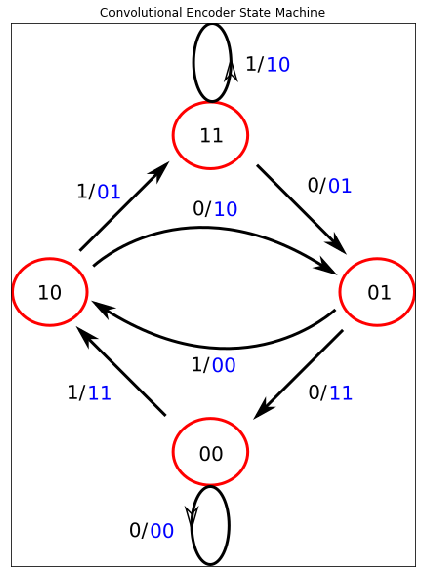

In [114]:
plt.figure(figsize=(10,10))
plt.xticks([]),plt.yticks([])
plt.title("Convolutional Encoder State Machine")
img = mpimg.imread('st_machine.png')
plt.imshow(img)
plt.show()

Bir Viterbi kod çözücü, evrişimli bir kodlayıcı tarafından oluşturulan bir bit akışının kodunu çözmek için Viterbi algoritmasını kullanır.

In [133]:
def viterbi_decoder(data,init_p,fsm):
    V=[{}]
    for state in fsm:
        V[0][state] = {"metric":init_p[state]}
    for t in range(1,len(data)+1):
        V.append({})
        for state in fsm:
            prev = fsm[state]['b1']['prev']
            fbit_m = V[(t-1)][prev]['metric'] + hamming(fsm[state]['b1']['out'],data[t-1])
            prev = fsm[state]['b2']['prev']
            sbit_m = V[(t-1)][prev]['metric'] + hamming(fsm[state]['b2']['out'],data[t-1])
            if fbit_m > sbit_m:
                V[t][state] = {"metric":sbit_m, "branch":"b2"}
            else: V[t][state] = {"metric":fbit_m, "branch":"b1"}

    # print trellis nodes metric:
    """ 
    for state in fsm:
        for t in range(0,len(V)):
            print("%4d" % V[t][state]["metric"],end="")
        print()
    print()
    """
    min_metric = min(V[t][state]["metric"] for state in fsm)
    best_path = []
    # traceback the path on smaller metric on last trellis column
    for state in fsm:
        if V[len(data)-1][state]["metric"] == min_metric:
            init_state = state
            for t in range(len(data),0,-1):
                branch = V[t][init_state]['branch']
                init_state = fsm[init_state][branch]['prev']
                best_path.append(fsm[init_state][branch]['in_b'])
    return best_path       

In [134]:
print("encoded_message = ",list(message))
dec = viterbi_decoder(message,init_p,fsm)
print("decoded_message = ",dec)

encoded_message =  ['10', '10', '11', '11', '01', '01']
decoded_message =  [1, 1, 0, 0, 1, 0]


# Viterbi Algorithm and Hidden Markov Model 
### Finding the most likely sequence of hidden states

In [138]:
obs_space = [0,1] 
data = np.array([0,0,1,1,0,1,0,0]) 
states = {'a':'00','b':'01','c':'10','d':'11'} 
prob = np.full(4,1/4)
transition = np.array([[0.18,0.82,0,0],[0,0,0.65,0.35],[0.19,0.81,0,0],[0,0,0.32,0.68]]) # NxN Matrix
emission = np.array([[0.76,0.24],[0.05,0.95],[0.89,0.11],[0.02,0.98]]) # NxM Matrix

In [145]:
def viterbi(data,states,prob,transition,emission):
    # initialization
    N = len(states) 
    T = len(data)                          # truncation length of the VA
    T1 = np.empty((N,T),dtype=np.single)   # tracking table for metrics of the survivor path 
    T2 = np.empty((N,T), dtype=np.uint8)   # tracking table for the survivor path 
    
    # initialization of tracking tables at t= 0
    T2[:,0] =  0
    T1[:,0] = prob * emission[:,data[0]]
    # updating the tracking tables for t = 1,2,...T
    for i in range(1,T):
        T1[:, i] = np.max(T1[:, i - 1] * transition.T * emission[np.newaxis, :, data[i]].T, 1)
        T2[:, i] = np.argmax(T1[:, i - 1] * transition.T, 1)
    
    # computing the survivor path
    survivor_path = np.empty(T, dtype=np.uint8)
    survivor_path[-1] = np.argmax(T1[:, T - 1])
    for i in range(T-1,0,-1):
        survivor_path[i-1] = T2[survivor_path[i],i]
    
    return survivor_path, np.around(T1,decimals=3), T2

In [146]:
best_path, t1, t2 = viterbi(data,states,prob,transition,emission)

In [151]:
print("observations  = ", data)
print("best_path = ", best_path)
print("The best path is the sequence of states having the most likely probability.")

observations  =  [0 0 1 1 0 1 0 0]
best_path =  [2 0 1 3 2 1 2 0]
The best path is the sequence of states having the most likely probability.
